#MSFT Stock Price Prediction Project

## Load Packages

In [ ]:
pip install tensorflow

In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib
import talib

--2021-12-21 06:01:51--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2021-12-21 06:01:51--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://phoenixnap.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2021-12-21 06:01:51--  http://phoenixnap.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving phoenixna

In [ ]:
import talib
import tensorflow

In [ ]:
pip install yfinance

     |████████████████████████████████| 6.4 MB 6.9 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
# Load libraries
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

#Libraries for Deep Learning Models
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from keras.layers import LSTM
from keras.wrappers.scikit_learn import KerasRegressor

#Libraries for Statistical Models
import statsmodels.api as sm

#Libraries for Saving the Model
from pickle import dump
from pickle import load

# Time series Models
from statsmodels.tsa.arima_model import ARIMA
#from statsmodels.tsa.statespace.sarimax import SARIMAX

# Error Metrics
from sklearn.metrics import mean_squared_error

# Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression


#Plotting
from pandas.plotting import scatter_matrix
from statsmodels.graphics.tsaplots import plot_acf

from datetime import *
# from pandas_datareader import data as pdr
import yfinance as yfin


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!pip install xgboost

In [ ]:
import xgboost
from xgboost import XGBRegressor

In [ ]:
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

## Load data

In [ ]:
ccy_data = pd.read_csv('/content/ccy.csv')

In [ ]:
ccy_data = ccy_data.set_index('DATE')

In [ ]:
ccy_data

,DEXJPUS,DEXUSUK
DATE,,
2011-01-03,81.56,1.5490
2011-01-04,81.96,1.5586
2011-01-05,83.22,1.5497
2011-01-06,83.15,1.5490
2011-01-07,83.04,1.5560
...,...,...
2018-12-26,110.45,1.2676
2018-12-27,110.78,1.2627
2018-12-28,110.34,1.2699


In [ ]:
idx_data = pd.read_csv('/content/idx.csv')
idx_data = idx_data.set_index('DATE')
idx_data

,SP500,DJIA,VIXCLS
DATE,,,
2011-01-03,NaN,NaN,17.61
2011-01-04,NaN,NaN,17.38
2011-01-05,NaN,NaN,17.02
2011-01-06,NaN,NaN,17.40
2011-01-07,NaN,NaN,17.14
...,...,...,...
2018-12-26,2467.70,22878.45,30.41
2018-12-27,2488.83,23138.82,29.96
2018-12-28,2485.74,23062.40,28.34


In [ ]:
stk_data = pd.read_pickle('/content/stk.pkl')
stk_data

Adj Close                        ...   Volume                   
                  GOOGL        IBM       MSFT  ...    GOOGL      IBM      MSFT
Date                                           ...                            
2011-01-03   302.477478  96.850716  22.061125  ...  4725670  4815575  53443800
2011-01-04   301.361359  96.955772  22.147861  ...  3645351  5292865  54405600
2011-01-05   304.839844  96.568344  22.076904  ...  5059535  4871640  58998700
2011-01-06   307.057068  97.625626  22.723440  ...  4111484  5260543  88026300
2011-01-07   308.528534  97.146210  22.549982  ...  4198198  4325942  73762000
...                 ...        ...        ...  ...      ...      ...       ...
2018-12-24   984.669983  88.776039  91.023140  ...  1818000  3997184  43935200
2018-12-26  1047.849976  91.928627  97.240906  ...  2315900  6951507  51634800
2018-12-27  1052.900024  93.901070  97.840446  ...  2299800  6323698  49498500
2018-12-28  1046.680054  93.282112  97.076515  ...  1719900  5352905  38196300
2018-12-31  1044.959961  93.810280  98.217567  ...  1655500  5212009  33173800

[2012 rows x 18 columns]

## Kalman Filter

In [ ]:
pip install pykalman

     |████████████████████████████████| 228 kB 5.1 MB/s 
  Created wheel for pykalman: filename=pykalman-0.9.5-py3-none-any.whl size=48461 sha256=24224cbf2d23d8fdde577e431bca9ca22b0c12b7de664b859cea5ae527c0f3dc
  Stored in directory: /root/.cache/pip/wheels/6a/04/02/2dda6ea59c66d9e685affc8af3a31ad3a5d87b7311689efce6
Successfully built pykalman


In [ ]:
#importkalman filter
from pykalman import KalmanFilter

In [ ]:
kf = KalmanFilter(transition_matrices = [1],
                  observation_matrices = [1],
                  initial_state_mean = 0,
                  initial_state_covariance = 1,
                  observation_covariance=1,
                  transition_covariance=.01)
state_means, _ = kf.filter(stk_data.loc[:, ('Adj Close', 'MSFT')])
msft_means = stk_data.loc[:, ('Adj Close', 'MSFT')].to_frame()
msft_means['Kalman Filter'] = state_means
for i in [12, 26, 60]:
    msft_means[f'MA ({i}d)'] = msft_means[('Adj Close', 'MSFT')].rolling(window=i).mean()


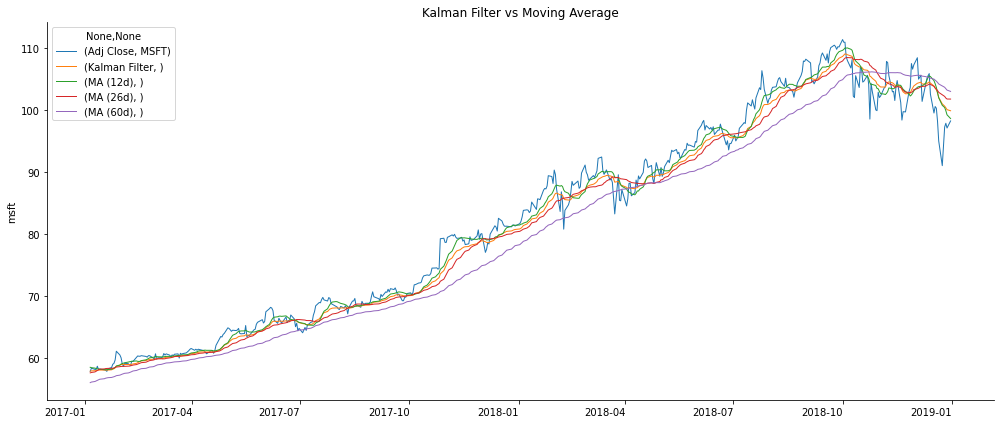

In [ ]:
ax = msft_means.tail(500).plot(title='Kalman Filter vs Moving Average', figsize=(14,6), lw=1, rot=0)
ax.set_xlabel('')
ax.set_ylabel('msft')
pyplot.tight_layout()
sns.despine();

In [ ]:
msft_means = msft_means.drop(('Adj Close', 'MSFT'), 1)
msft_means

,Kalman Filter,MA (12d),MA (26d),MA (60d)
,,,,
Date,,,,
2011-01-03,11.030562,NaN,NaN,NaN
2011-01-04,14.785412,NaN,NaN,NaN
2011-01-05,16.666775,NaN,NaN,NaN
2011-01-06,17.946972,NaN,NaN,NaN
2011-01-07,18.781255,NaN,NaN,NaN
...,...,...,...,...
2018-12-24,100.959306,100.726925,102.414702,103.850190
2018-12-26,100.605594,100.383641,102.164770,103.635549


## Feature Engineering

In [ ]:
return_period = 5

In [ ]:
Y = np.log(stk_data.loc[:, ('Adj Close', 'MSFT')]).diff(return_period).shift(-return_period)
Y.name = Y.name[-1]+'_pred'

X1 = np.log(stk_data.loc[:, ('Adj Close', ('GOOGL', 'IBM'))]).diff(return_period)
X1.columns = X1.columns.droplevel()
X2 = np.log(ccy_data).diff(return_period)
X3 = np.log(idx_data).diff(return_period)

X4 = pd.concat([np.log(stk_data.loc[:, ('Adj Close', 'MSFT')]).diff(i) for i in [return_period, return_period*3, return_period*6, return_period*12]], axis=1).dropna()
X4.columns = ['MSFT_DT', 'MSFT_3DT', 'MSFT_6DT', 'MSFT_12DT']

X = pd.concat([X1, X2, X3, X4], axis=1)

# import dix and gex
dix_gex = pd.read_csv("/content/DIX_GEX_SP500.csv")
dix_gex = dix_gex.drop('SP500price', 1)
dix_gex['date'] = pd.to_datetime(dix_gex['date'])
dix_gex = dix_gex.set_index("date")
# standardized
#dix_gex=(dix_gex-dix_gex.mean())/dix_gex.std()
X = X.join(dix_gex)
# ADD kalman filter smoothing feature
X = X.join(msft_means['Kalman Filter'])

#import technical indicators
rsi=talib.RSI(stk_data.loc[:, ('Adj Close', 'MSFT')], timeperiod=14)
rsi.name='RSI'
X = X.join(rsi)
adx=talib.ADX(stk_data.loc[:, ('High', 'MSFT')],stk_data.loc[:, ('Low', 'MSFT')],stk_data.loc[:, ('Adj Close', 'MSFT')],timeperiod=14)
adx.name='ADX'
X = X.join(adx)
macd, macdsignal, macdhist = talib.MACD(stk_data.loc[:, ('Adj Close', 'MSFT')], fastperiod=12, slowperiod=26, signalperiod=9)
macdhist.name='MACD'
X = X.join(macdhist)
aroon = talib.AROONOSC(stk_data.loc[:, ('High', 'MSFT')], stk_data.loc[:, ('Low', 'MSFT')], timeperiod=14)
aroon.name='AROONOSC'
X = X.join(aroon)
mfi = talib.MFI(stk_data.loc[:, ('High', 'MSFT')], stk_data.loc[:, ('Low', 'MSFT')], stk_data.loc[:, ('Adj Close', 'MSFT')], stk_data.loc[:, ('Volume', 'MSFT')], timeperiod=14)
mfi.name='MFI'
X = X.join(mfi)
mom = talib.MOM(stk_data.loc[:, ('Adj Close', 'MSFT')], timeperiod=10)
mom.name='MOM'
X = X.join(mom)
ad = talib.AD(stk_data.loc[:, ('High', 'MSFT')], stk_data.loc[:, ('Low', 'MSFT')], stk_data.loc[:, ('Adj Close', 'MSFT')], stk_data.loc[:, ('Volume', 'MSFT')])
ad.name='AD'
X = X.join(ad)
obv = talib.OBV(stk_data.loc[:, ('Adj Close', 'MSFT')], stk_data.loc[:, ('Volume', 'MSFT')])
obv.name='OBV'
X = X.join(obv)
sar = talib.SAR(stk_data.loc[:, ('High', 'MSFT')], stk_data.loc[:, ('Low', 'MSFT')], acceleration=0.02, maximum=0.2)
sar.name='SAR'
X = X.join(sar)

dataset = pd.concat([Y, X], axis=1).dropna().iloc[::return_period, :]
Y = dataset.loc[:, Y.name]
X = dataset.loc[:, X.columns]

In [ ]:
X.shape

(334, 23)

In [ ]:
pd.set_option('precision', 3)
dataset.describe()

,MSFT_pred,GOOGL,IBM,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_DT,MSFT_3DT,MSFT_6DT,MSFT_12DT,dix,gex,Kalman Filter,RSI,ADX,MACD,AROONOSC,MFI,MOM,AD,OBV,SAR
count,334.000,334.000,3.340e+02,3.340e+02,3.340e+02,334.000,334.000,334.000,334.000,334.000,334.000,334.000,334.000,3.340e+02,334.000,334.000,334.000,334.000,334.000,334.000,334.000,3.340e+02,3.340e+02,334.000
mean,0.005,0.004,-6.348e-04,8.945e-04,-2.073e-04,0.002,0.002,-0.002,0.004,0.014,0.027,0.055,0.418,2.258e+09,48.714,55.584,22.366,-0.001,19.397,52.988,0.437,-9.998e+11,-6.023e+08,53.533
std,0.030,0.033,2.779e-02,1.325e-02,1.298e-02,0.018,0.018,0.150,0.032,0.046,0.063,0.084,0.028,1.409e+09,23.780,11.070,9.107,0.204,59.453,13.571,1.994,2.737e+11,5.086e+08,23.347
min,-0.121,-0.109,-1.284e-01,-4.529e-02,-9.836e-02,-0.069,-0.063,-0.442,-0.155,-0.164,-0.133,-0.154,0.337,-2.236e+09,20.827,26.768,7.854,-0.830,-100.000,19.325,-7.929,-1.311e+12,-2.023e+09,25.470
25%,-0.010,-0.015,-1.478e-02,-7.319e-03,-6.964e-03,-0.006,-0.006,-0.091,-0.012,-0.011,-0.012,0.002,0.398,1.324e+09,28.993,48.909,15.381,-0.112,-35.714,43.357,-0.675,-1.235e+12,-8.839e+08,34.709
50%,0.006,0.006,8.603e-04,1.161e-03,-2.238e-04,0.003,0.003,-0.012,0.006,0.014,0.029,0.064,0.419,2.188e+09,41.335,55.414,20.455,0.005,42.857,52.856,0.434,-1.085e+12,-6.362e+08,47.280
75%,0.022,0.024,1.548e-02,8.300e-03,7.977e-03,0.013,0.013,0.078,0.022,0.041,0.061,0.107,0.437,3.170e+09,60.448,62.303,27.769,0.101,64.286,62.635,1.360,-8.239e+11,-3.506e+08,65.294
max,0.117,0.174,8.308e-02,5.300e-02,3.737e-02,0.046,0.047,0.687,0.117,0.159,0.210,0.256,0.506,7.644e+09,108.875,89.265,50.196,0.810,100.000,88.572,8.488,-3.464e+11,5.086e+08,116.180


In [ ]:
dataset.head()

,MSFT_pred,GOOGL,IBM,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_DT,MSFT_3DT,MSFT_6DT,MSFT_12DT,dix,gex,Kalman Filter,RSI,ADX,MACD,AROONOSC,MFI,MOM,AD,OBV,SAR
2011-12-27,0.051,0.029,0.011,8.998e-04,-1.914e-04,0.019,0.015,-0.058,0.020,0.013,-0.025,0.053,0.435,1.823e+09,20.827,54.608,9.874,0.062,50.000,43.783,0.429,-3.464e+11,-6.004e+08,26.175
2012-01-04,0.012,0.043,0.003,-1.681e-02,1.028e-02,0.022,0.022,-0.057,0.051,0.071,0.080,0.050,0.456,2.149e+09,21.063,68.271,11.853,0.127,57.143,59.819,1.514,-3.519e+11,-4.898e+08,25.470
2012-01-12,0.059,-0.046,-0.023,-5.457e-03,-1.006e-02,0.011,0.004,-0.048,0.011,0.073,0.120,0.045,0.453,2.400e+09,21.731,68.287,23.121,0.144,71.429,72.665,1.765,-3.606e+11,-3.501e+08,26.393
2012-01-20,-0.016,-0.072,0.043,9.099e-04,1.550e-02,0.020,0.024,-0.134,0.059,0.140,0.147,0.096,0.438,5.358e+09,22.280,78.492,29.741,0.133,100.000,81.057,1.643,-3.690e+11,-1.905e+08,27.326
2012-01-30,0.020,-0.013,0.013,-8.355e-03,6.907e-03,-0.002,-0.004,0.038,-0.004,0.052,0.146,0.138,0.465,1.686e+09,22.996,70.275,35.187,0.053,50.000,76.227,1.101,-3.769e+11,-1.491e+08,29.950


## Data Visualization

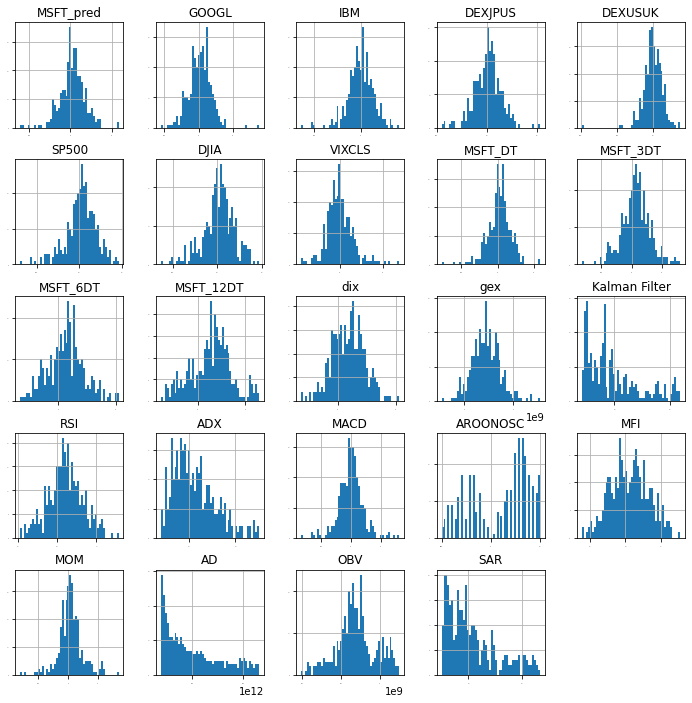

In [ ]:
dataset.hist(bins=50, sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
pyplot.show()

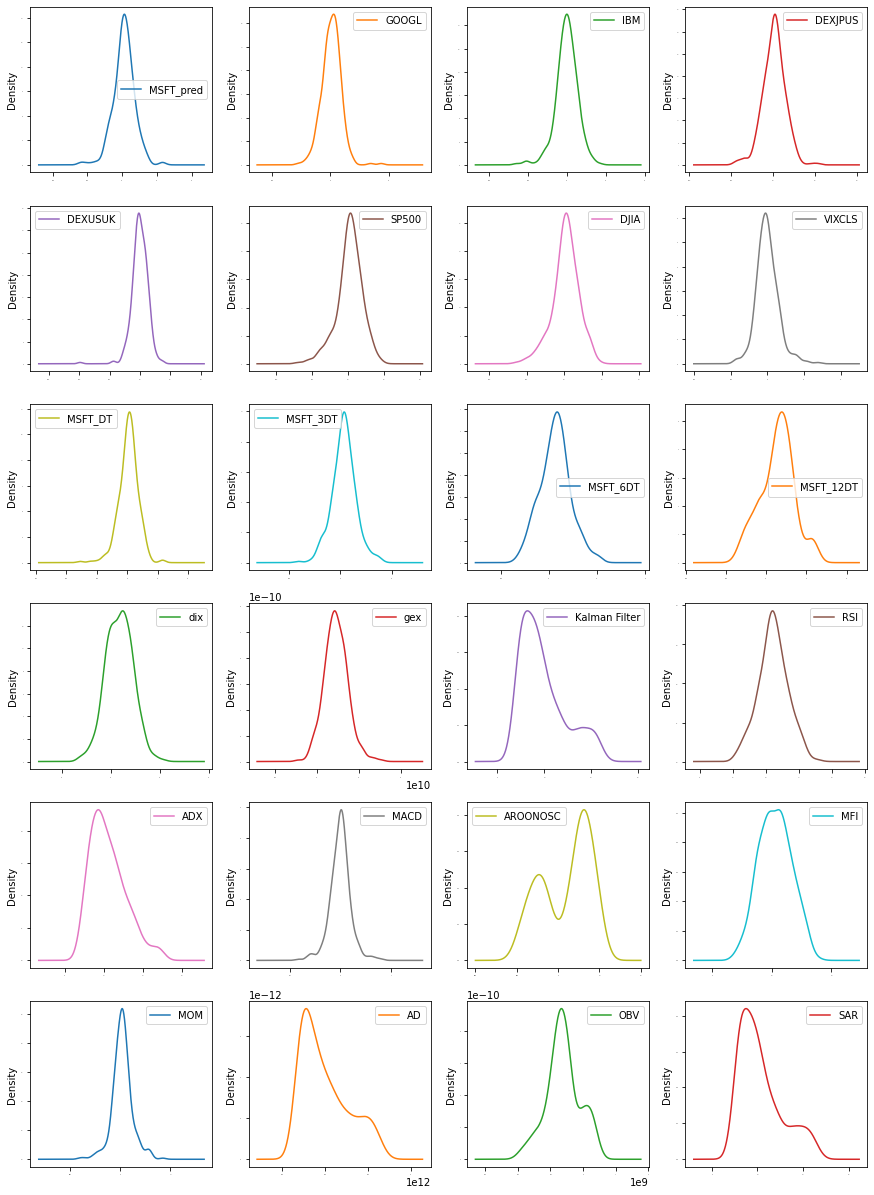

In [ ]:
dataset.plot(kind='density', subplots=True, layout=(7,4), sharex=False, legend=True, fontsize=1, figsize=(15,25))
pyplot.show()

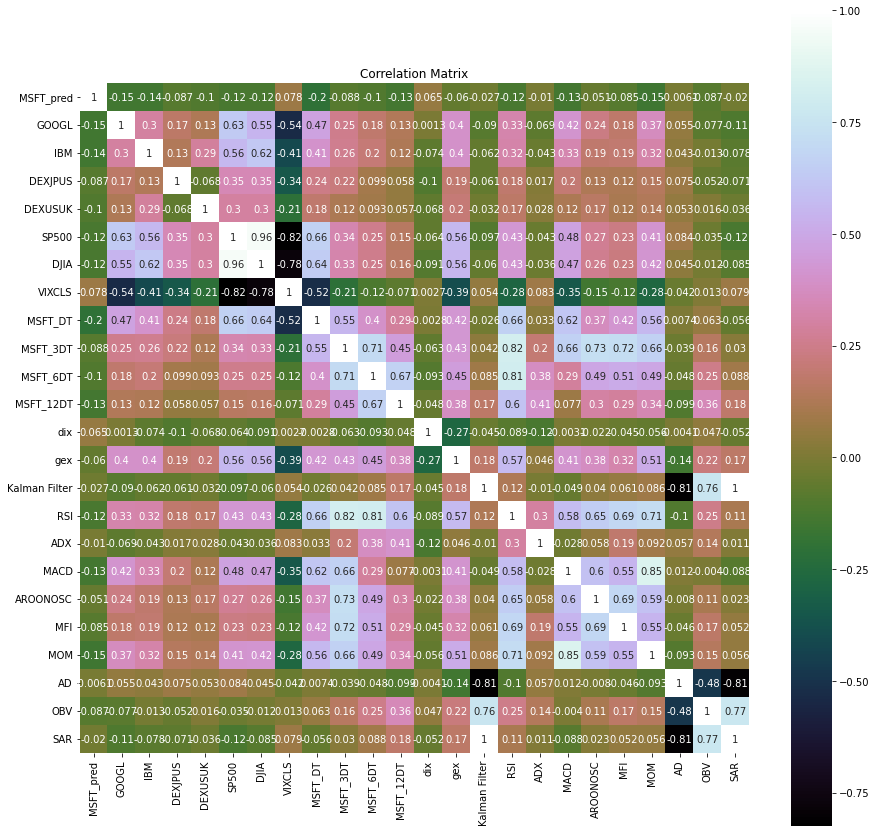

In [ ]:
correlation = dataset.corr()
pyplot.figure(figsize=(15,15))
pyplot.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

## Time Series Analysis

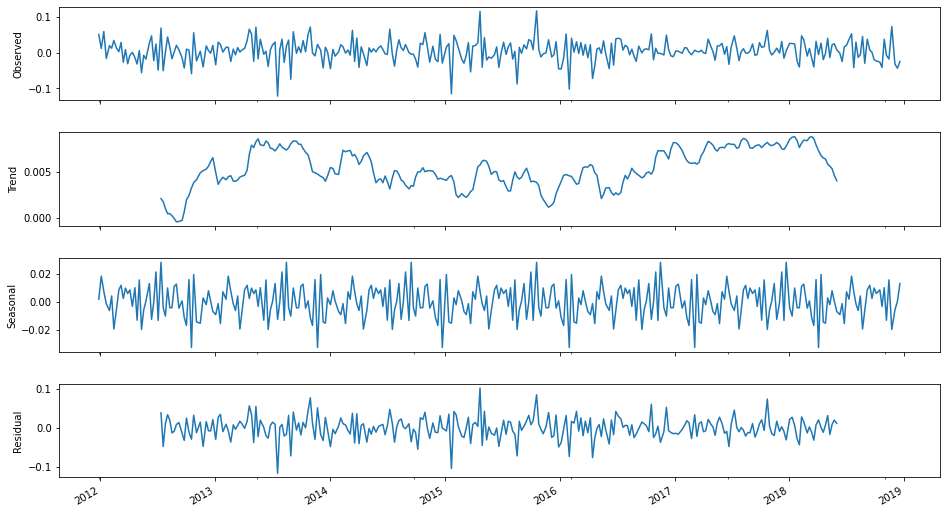

In [ ]:
res = sm.tsa.seasonal_decompose(Y,freq=52)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
pyplot.show()

## Train Test Split

In [ ]:
validation_size = 0.2

#In case the data is not dependent on the time series, then train and test split randomly
# seed = 7
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=validation_size, random_state=seed)

#In case the data is dependent on the time series, then train and test split should be done based on sequential sample
#This can be done by selecting an arbitrary split point in the ordered list of observations and creating two new datasets.
train_size = int(len(X) * (1-validation_size))
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(X)]

In [ ]:
X_train

,GOOGL,IBM,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_DT,MSFT_3DT,MSFT_6DT,MSFT_12DT,dix,gex,Kalman Filter,RSI,ADX,MACD,AROONOSC,MFI,MOM,AD,OBV,SAR
2011-12-27,0.029,0.011,8.998e-04,-1.914e-04,1.925e-02,1.539e-02,-0.058,0.020,1.314e-02,-0.025,0.053,0.435,1.823e+09,20.827,54.608,9.874,0.062,50.000,43.783,0.429,-3.464e+11,-6.004e+08,26.175
2012-01-04,0.043,0.003,-1.681e-02,1.028e-02,2.189e-02,2.174e-02,-0.057,0.051,7.147e-02,0.080,0.050,0.456,2.149e+09,21.063,68.271,11.853,0.127,57.143,59.819,1.514,-3.519e+11,-4.898e+08,25.470
2012-01-12,-0.046,-0.023,-5.457e-03,-1.006e-02,1.121e-02,4.446e-03,-0.048,0.011,7.295e-02,0.120,0.045,0.453,2.400e+09,21.731,68.287,23.121,0.144,71.429,72.665,1.765,-3.606e+11,-3.501e+08,26.393
2012-01-20,-0.072,0.043,9.099e-04,1.550e-02,2.019e-02,2.374e-02,-0.134,0.059,1.403e-01,0.147,0.096,0.438,5.358e+09,22.280,78.492,29.741,0.133,100.000,81.057,1.643,-3.690e+11,-1.905e+08,27.326
2012-01-30,-0.013,0.013,-8.355e-03,6.907e-03,-2.275e-03,-4.345e-03,0.038,-0.004,5.199e-02,0.146,0.138,0.465,1.686e+09,22.996,70.275,35.187,0.053,50.000,76.227,1.101,-3.769e+11,-1.491e+08,29.950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-23,0.028,-0.008,3.782e-03,-3.999e-03,2.114e-03,4.900e-04,-0.035,0.017,-7.694e-03,0.045,0.090,0.428,2.241e+09,66.124,58.399,21.027,-0.134,-35.714,42.486,0.837,-1.252e+12,-4.319e+08,71.367
2017-06-30,-0.059,-0.002,1.019e-02,2.084e-02,-6.125e-03,-2.112e-03,0.110,-0.033,-1.996e-02,0.018,0.056,0.412,1.312e+09,65.765,44.813,19.695,-0.291,-21.429,51.926,-1.007,-1.253e+12,-4.557e+08,71.638
2017-07-10,0.023,-0.003,6.684e-03,-5.187e-03,-6.507e-04,-3.299e-03,-0.010,0.015,-2.857e-04,0.005,0.076,0.440,2.237e+09,65.479,52.268,20.245,-0.108,-35.714,47.365,-1.157,-1.254e+12,-4.399e+08,71.032
2017-07-18,0.034,0.005,-2.044e-02,1.353e-02,1.436e-02,7.708e-03,-0.096,0.046,3.852e-02,0.014,0.105,0.440,4.073e+09,66.604,66.989,20.675,0.410,64.286,60.680,4.826,-1.255e+12,-3.632e+08,68.937


## Feature Selection

Method 1:

In [ ]:
bestfeatures = SelectKBest(k=10, score_func=f_regression)
fit = bestfeatures.fit(X_train,Y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores.nlargest(10,'Score').set_index('Specs')  #print 10 best features

,Score
Specs,
MSFT_DT,12.758
IBM,12.416
DJIA,7.302
SP500,6.517
MSFT_12DT,5.781
GOOGL,5.343
MOM,4.824
RSI,4.578
DEXUSUK,3.517


<Figure size 1440x1440 with 0 Axes>

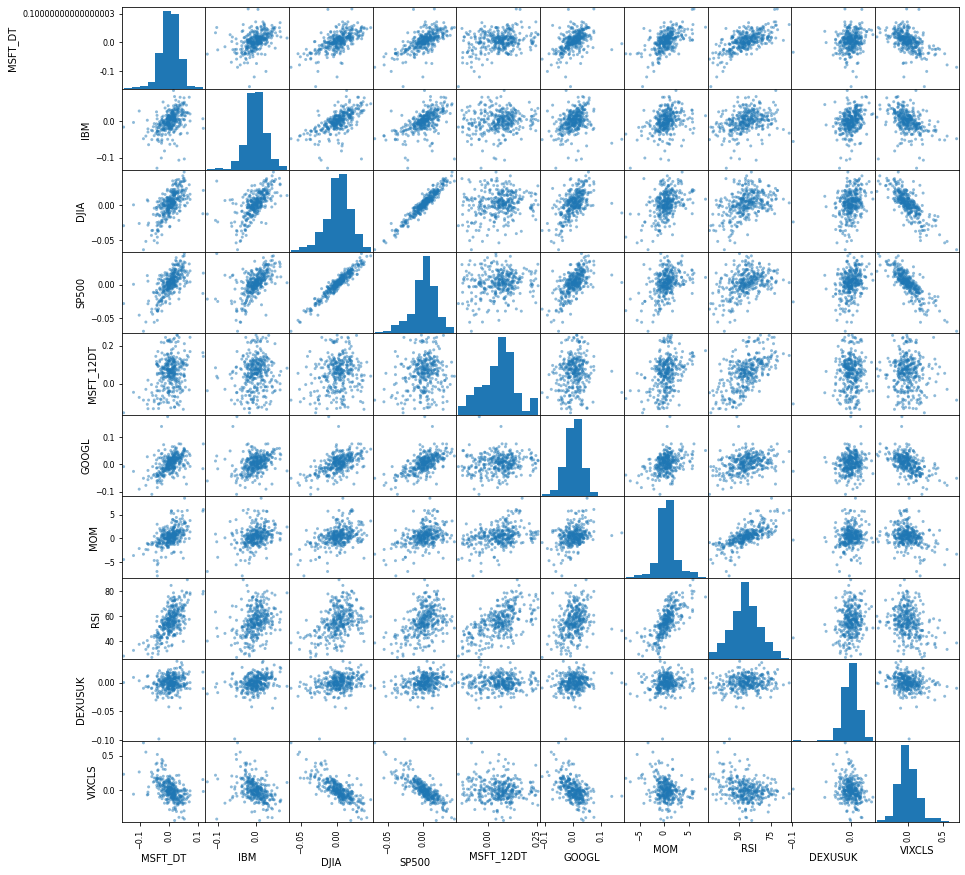

In [ ]:
pyplot.figure(figsize=(20,20))
scatter_matrix(dataset[featureScores.nlargest(10,'Score')['Specs']],figsize=(15,15))
pyplot.show()

Method 2: Using PCA

In [ ]:
Y_train

2011-12-27    0.051
2012-01-04    0.012
2012-01-12    0.059
2012-01-20   -0.016
2012-01-30    0.020
              ...  
2017-06-23   -0.033
2017-06-30    0.015
2017-07-10    0.047
2017-07-18    0.012
2017-07-25   -0.022
Name: MSFT_pred, Length: 267, dtype: float64

In [ ]:
# Since PCA is affected by scale, so we need to standardize the data first
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_std = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns, index=X_train.index)
X_test_std = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns, index=X_test.index)

In [ ]:
X_train_std

,GOOGL,IBM,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_DT,MSFT_3DT,MSFT_6DT,MSFT_12DT,dix,gex,Kalman Filter,RSI,ADX,MACD,AROONOSC,MFI,MOM,AD,OBV,SAR
2011-12-27,0.758,0.436,-0.016,0.003,0.968,0.801,-0.361,0.462,0.008,-0.737,0.038,0.538,-0.234,-1.434,-0.025,-1.399,0.360,0.544,-0.669,0.050,2.238,0.439,-1.426
2012-01-04,1.182,0.129,-1.279,0.804,1.123,1.187,-0.353,1.404,1.210,0.837,0.012,1.304,0.040,-1.415,1.196,-1.177,0.742,0.662,0.516,0.739,2.217,0.718,-1.483
2012-01-12,-1.562,-0.854,-0.469,-0.753,0.497,0.134,-0.294,0.211,1.240,1.436,-0.053,1.187,0.251,-1.361,1.197,0.083,0.843,0.899,1.466,0.898,2.183,1.071,-1.408
2012-01-20,-2.377,1.661,-0.016,1.203,1.023,1.309,-0.883,1.658,2.628,1.837,0.525,0.652,2.738,-1.317,2.109,0.823,0.781,1.374,2.087,0.821,2.151,1.475,-1.332
2012-01-30,-0.565,0.512,-0.676,0.546,-0.292,-0.402,0.298,-0.259,0.808,1.827,0.993,1.640,-0.350,-1.259,1.375,1.432,0.302,0.544,1.730,0.477,2.120,1.580,-1.117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-23,0.729,-0.307,0.189,-0.289,-0.035,-0.107,-0.206,0.382,-0.421,0.318,0.453,0.250,0.117,2.223,0.313,-0.151,-0.808,-0.879,-0.765,0.309,-1.248,0.865,2.264
2017-06-30,-1.975,-0.062,0.646,1.612,-0.517,-0.266,0.785,-1.122,-0.673,-0.090,0.073,-0.312,-0.664,2.194,-0.901,-0.300,-1.741,-0.642,-0.067,-0.861,-1.252,0.805,2.286
2017-07-10,0.556,-0.095,0.396,-0.380,-0.197,-0.338,-0.032,0.321,-0.268,-0.280,0.299,0.720,0.114,2.171,-0.235,-0.239,-0.650,-0.879,-0.405,-0.957,-1.255,0.844,2.237
2017-07-18,0.921,0.209,-1.537,1.052,0.682,0.333,-0.623,1.262,0.531,-0.147,0.620,0.709,1.657,2.262,1.081,-0.191,2.426,0.781,0.580,2.842,-1.260,1.038,2.066


In [ ]:
X_test_std

,GOOGL,IBM,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_DT,MSFT_3DT,MSFT_6DT,MSFT_12DT,dix,gex,Kalman Filter,RSI,ADX,MACD,AROONOSC,MFI,MOM,AD,OBV,SAR
2017-08-01,-0.875,-0.226,-0.877,0.950,-0.177,0.843,0.498,-0.801,0.486,-3.049e-04,0.078,-1.026,0.435,2.386,-0.055,0.151,-0.575,1.018,-0.453,-0.652,-1.270,0.789,2.349
2017-08-08,-0.225,-0.440,0.184,-1.374,-0.193,0.199,0.601,-0.049,-0.406,1.150e-01,0.212,-0.562,0.615,2.388,0.046,-0.505,-1.123,-0.761,-0.935,-1.058,-1.274,0.742,2.495
2017-08-15,-0.349,-0.003,-0.287,-0.611,-0.403,-0.376,0.678,0.203,-0.424,7.923e-01,0.387,-0.172,0.306,2.398,0.386,-0.790,-0.326,-1.591,-1.471,0.393,-1.279,0.777,2.456
2017-08-22,-0.071,-0.279,-0.742,-0.149,-0.447,-0.412,-0.368,-0.161,0.011,3.855e-01,0.008,-1.112,-0.197,2.415,0.148,-1.060,-0.279,0.069,-0.300,0.232,-1.282,0.803,2.275
2017-08-29,-0.301,0.581,-0.329,0.629,-0.307,-0.233,0.243,-0.182,-0.079,-3.289e-01,-0.374,0.038,-0.223,2.427,0.074,-1.347,-0.185,0.069,-1.300,-0.324,-1.284,0.824,2.295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-14,-1.687,-0.958,0.158,-0.761,-2.543,-2.751,1.824,-1.957,0.353,-1.681e+00,-0.612,-0.724,-2.288,5.278,-1.017,0.361,0.420,0.425,-1.643,-1.070,-1.467,2.434,4.706
2018-11-23,-1.357,-1.356,-0.036,-0.192,-2.421,-2.901,1.204,-1.348,-0.735,-6.997e-01,-1.438,0.121,-2.201,5.168,-1.138,0.853,-2.345,-1.354,-0.533,-5.255,-1.469,2.378,5.560
2018-12-03,1.579,1.805,-0.106,-0.384,2.347,2.727,-0.918,1.420,0.295,1.726e-01,-0.109,-0.611,0.631,5.304,0.420,-0.020,4.799,0.662,0.644,2.111,-1.471,2.753,4.607
2018-12-11,-1.707,-1.367,0.222,-1.165,-1.547,-1.757,0.364,-1.097,-0.205,-6.629e-02,-0.987,-0.672,-1.937,5.300,-0.291,-0.419,0.581,0.662,0.521,1.079,-1.473,2.859,4.808


In [ ]:
# Use PCA, choose the minimum number of principal components such that 95% of the variance is retained
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95,random_state=77)
#apply to training set
X_train_pc = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_.cumsum()

array([0.31966299, 0.47158743, 0.58601873, 0.65707056, 0.70687463,
       0.75427362, 0.78813359, 0.81996298, 0.8486459 , 0.87449699,
       0.89809918, 0.91873712, 0.93764701, 0.95224982])

**From the results above, we know that in order to achieve 95% explained variance, we need 14 Principle Components based on the data provided.**

In [ ]:
# finalize the train data
df_X_train = pd.DataFrame(data = X_train_pc, index= X_train.index, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14'])
df_X_train

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
2011-12-27,-0.608,2.871,-0.330,-0.192,-1.449,1.058,0.367,0.879,-1.171,0.364,0.170,-0.232,-0.359,-0.495
2012-01-04,-2.809,1.963,-1.231,-0.445,-2.780,0.885,1.136,0.777,-0.815,0.473,0.500,0.509,-0.113,0.307
2012-01-12,-1.987,0.428,-3.109,-0.193,-1.152,1.433,-0.769,0.664,-1.247,0.585,-0.052,1.413,1.341,-0.197
2012-01-20,-5.354,0.760,-2.582,1.295,-1.785,-0.836,-2.397,1.285,-1.285,0.365,0.153,1.223,1.973,0.913
2012-01-30,-1.786,-0.503,-3.462,1.320,-2.425,0.959,-0.703,0.477,-0.408,-0.310,-0.577,-0.014,0.245,0.218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-23,0.064,-2.651,2.402,0.668,0.627,0.249,0.705,-0.015,0.146,0.461,0.498,-0.339,-0.455,0.061
2017-06-30,2.263,-2.808,1.766,0.832,0.020,-1.766,-1.975,-1.021,-0.633,-0.416,0.734,0.002,-0.624,-0.169
2017-07-10,0.759,-2.540,2.557,0.468,0.418,0.492,0.210,-0.013,-0.258,-0.111,0.267,-0.264,-0.486,0.742
2017-07-18,-3.783,-2.877,1.829,-1.701,-1.166,-0.810,1.120,0.131,0.727,1.918,-0.317,-0.551,0.742,-0.470


In [ ]:
# transform the test set
X_test_pc=pca.transform(X_test_std)
# finalize the test data
df_X_test = pd.DataFrame(data = X_test_pc, index= X_test.index, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14'])
df_X_test

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
2017-08-01,0.172,-2.856,1.598,0.335,0.132,-2.204,-0.327,-0.658,-0.369,-0.183,-0.411,0.656,0.074,-0.666
2017-08-08,1.180,-2.749,2.380,0.800,1.775,-0.284,0.358,0.680,-0.607,0.063,0.297,0.407,-0.127,0.449
2017-08-15,0.759,-3.087,2.099,0.396,1.010,-0.563,0.459,1.227,0.293,0.983,1.176,-0.467,-0.112,-0.043
2017-08-22,0.233,-2.782,1.764,-0.557,0.787,-1.199,0.528,0.135,-0.341,0.496,0.077,0.616,-0.815,-0.819
2017-08-29,0.767,-2.454,2.555,-0.680,-0.255,-1.172,-0.242,0.394,-0.395,0.118,0.582,-0.466,-0.460,-0.536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-14,4.249,-6.881,1.674,-1.462,1.326,-0.447,-1.849,-0.635,-0.187,0.858,-1.184,-1.068,-1.384,-1.384
2018-11-23,6.315,-6.876,3.071,1.041,0.549,-0.266,-1.696,-1.574,-0.809,-0.885,-0.987,0.973,-1.691,1.820
2018-12-03,-5.547,-4.026,5.424,-2.004,0.344,-0.105,-0.560,1.041,1.116,1.999,-2.299,-0.520,-0.895,-0.979
2018-12-11,1.536,-6.939,1.909,-2.160,1.457,0.040,-1.757,-0.617,-0.715,1.387,-1.238,0.378,-1.208,-1.618


In [ ]:
df_X=pd.concat([df_X_train,df_X_test])
df_X

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
2011-12-27,-0.608,2.871,-0.330,-0.192,-1.449,1.058,0.367,0.879,-1.171,0.364,0.170,-0.232,-0.359,-0.495
2012-01-04,-2.809,1.963,-1.231,-0.445,-2.780,0.885,1.136,0.777,-0.815,0.473,0.500,0.509,-0.113,0.307
2012-01-12,-1.987,0.428,-3.109,-0.193,-1.152,1.433,-0.769,0.664,-1.247,0.585,-0.052,1.413,1.341,-0.197
2012-01-20,-5.354,0.760,-2.582,1.295,-1.785,-0.836,-2.397,1.285,-1.285,0.365,0.153,1.223,1.973,0.913
2012-01-30,-1.786,-0.503,-3.462,1.320,-2.425,0.959,-0.703,0.477,-0.408,-0.310,-0.577,-0.014,0.245,0.218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-14,4.249,-6.881,1.674,-1.462,1.326,-0.447,-1.849,-0.635,-0.187,0.858,-1.184,-1.068,-1.384,-1.384
2018-11-23,6.315,-6.876,3.071,1.041,0.549,-0.266,-1.696,-1.574,-0.809,-0.885,-0.987,0.973,-1.691,1.820
2018-12-03,-5.547,-4.026,5.424,-2.004,0.344,-0.105,-0.560,1.041,1.116,1.999,-2.299,-0.520,-0.895,-0.979
2018-12-11,1.536,-6.939,1.909,-2.160,1.457,0.040,-1.757,-0.617,-0.715,1.387,-1.238,0.378,-1.208,-1.618


## Evaluation Metrics

In [ ]:
num_folds = 10
seed = 77
# scikit is moving away from mean_squared_error.
# In order to avoid confusion, and to allow comparison with other models, we invert the final scores
scoring = 'neg_mean_squared_error'

## ML Models

In [ ]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [ ]:
# Boosting methods
models.append(('ABR', AdaBoostRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
models.append(('XGBoost', XGBRegressor()))

# Bagging methods
models.append(('RFR', RandomForestRegressor()))
models.append(('ETR', ExtraTreesRegressor()))

In [ ]:
names = []
kfold_results = []
test_results = []
train_results = []
for name, model in models:
    names.append(name)

    ## K Fold analysis:

    kfold = KFold(n_splits=num_folds, random_state=None)
    #converted mean square error to positive. The lower the beter
    cv_results = -1* cross_val_score(model, df_X_train, Y_train, cv=kfold, scoring=scoring)
    kfold_results.append(cv_results)


    # Full Training period
    res = model.fit(df_X_train, Y_train)
    train_result = mean_squared_error(res.predict(df_X_train), Y_train)
    train_results.append(train_result)

    # Test results
    test_result = mean_squared_error(res.predict(df_X_test), Y_test)
    test_results.append(test_result)

    msg = "%s: %f (%f) %f %f" % (name, cv_results.mean(), cv_results.std(), train_result, test_result)
    print(msg)

LR: 0.000972 (0.000448) 0.000873 0.000813
LASSO: 0.000982 (0.000489) 0.000981 0.000704
EN: 0.000982 (0.000489) 0.000981 0.000704
KNN: 0.001184 (0.000457) 0.000808 0.000753
CART: 0.002117 (0.000663) 0.000000 0.004224
SVR: 0.001103 (0.000484) 0.001084 0.000753
ABR: 0.001034 (0.000480) 0.000468 0.000765
GBR: 0.001093 (0.000483) 0.000141 0.000964
[13:28:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:28:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:28:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:28:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:28:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:28:15] WARNING: 

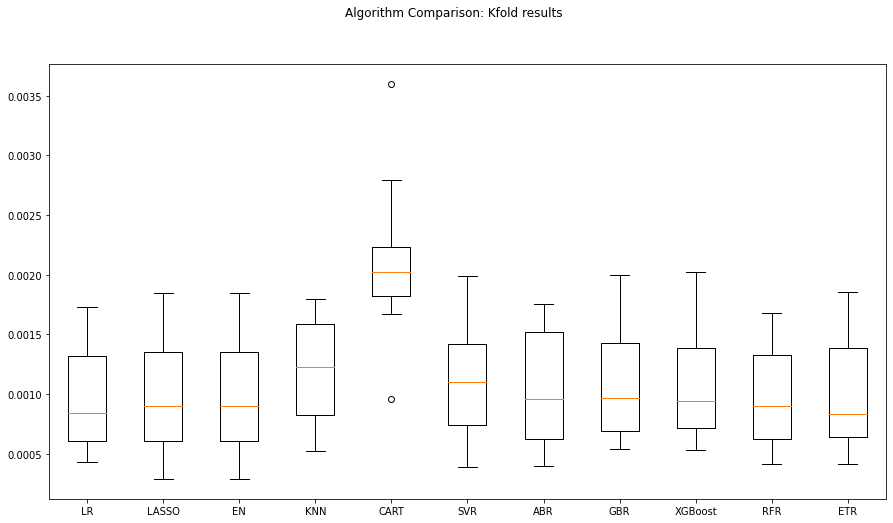

In [ ]:
# The lower results the better model
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison: Kfold results')
ax = fig.add_subplot(111)
pyplot.boxplot(kfold_results)
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
pyplot.show()

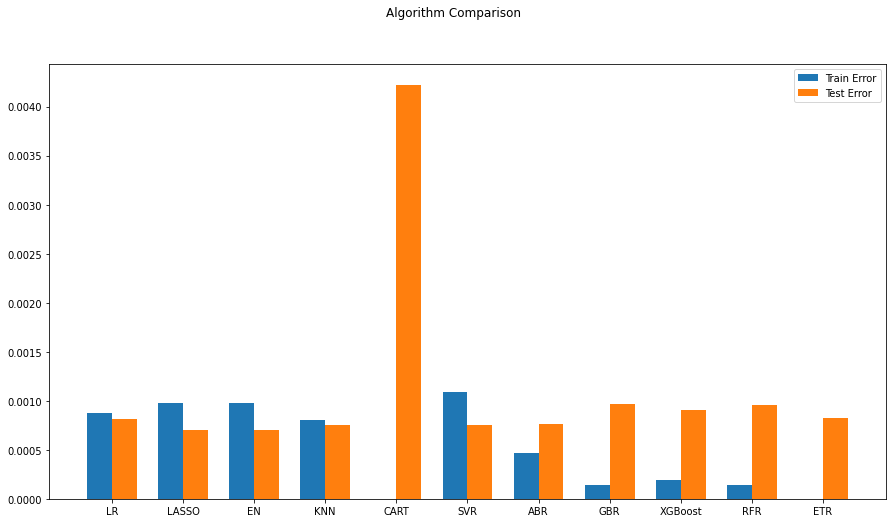

In [ ]:
# compare algorithms
fig = pyplot.figure()

ind = np.arange(len(names))  # the x locations for the groups
width = 0.35  # the width of the bars

fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.bar(ind - width/2, train_results,  width=width, label='Train Error')
pyplot.bar(ind + width/2, test_results, width=width, label='Test Error')
fig.set_size_inches(15,8)
pyplot.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
pyplot.show()

## ARIMA Model


In [ ]:
X_train_ARIMA=X_train_std.loc[:, ['GOOGL', 'IBM', 'DEXJPUS', 'SP500', 'DEXUSUK', 'DJIA', 'VIXCLS', 'dix', 'gex','RSI','ADX','MOM','MACD','MFI','OBV']]
X_test_ARIMA=X_test_std.loc[:, ['GOOGL', 'IBM', 'DEXJPUS', 'SP500', 'DEXUSUK', 'DJIA', 'VIXCLS', 'dix', 'gex','RSI','ADX','MOM','MACD','MFI','OBV']]
tr_len = len(X_train_ARIMA)
te_len = len(X_test_ARIMA)
to_len = len (X)

In [ ]:
modelARIMA=ARIMA(endog=Y_train,exog=X_train_ARIMA,order=[1,0,0])
model_fit = modelARIMA.fit()

In [ ]:
error_Training_ARIMA = mean_squared_error(Y_train, model_fit.fittedvalues)
predicted = model_fit.predict(start = tr_len -1 ,end = to_len -1, exog = X_test_ARIMA)[1:]
error_Test_ARIMA = mean_squared_error(Y_test,predicted)
error_Test_ARIMA

0.0009694345045062317

### LSTM Model

In [ ]:
Y_train

2011-12-27    0.051
2012-01-04    0.012
2012-01-12    0.059
2012-01-20   -0.016
2012-01-30    0.020
              ...  
2017-06-23   -0.033
2017-06-30    0.015
2017-07-10    0.047
2017-07-18    0.012
2017-07-25   -0.022
Name: MSFT_pred, Length: 267, dtype: float64

In [ ]:
seq_len = 2 #Length of the seq for the LSTM

Y_train_LSTM, Y_test_LSTM = np.array(Y_train)[seq_len-1:], np.array(Y_test)
X_train_LSTM = np.zeros((df_X_train.shape[0]+1-seq_len, seq_len, df_X_train.shape[1]))
X_test_LSTM = np.zeros((df_X_test.shape[0], seq_len, df_X.shape[1]))
for i in range(seq_len):
    X_train_LSTM[:, i, :] = np.array(df_X_train)[i:df_X_train.shape[0]+i+1-seq_len, :]
    X_test_LSTM[:, i, :] = np.array(df_X)[df_X_train.shape[0]+i-1:df_X.shape[0]+i+1-seq_len, :]

In [ ]:
# LSTM Network
from keras.regularizers import l2
def create_LSTMmodel(neurons=14, learn_rate = 0.01, momentum=0):
    # create model
    model = Sequential()
    model.add(LSTM(10, input_shape=(X_train_LSTM.shape[1], X_train_LSTM.shape[2]),dropout=0.2, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
    model.add(Dense(1))
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    model.compile(loss='mse', optimizer='adam')
    return model
LSTMModel = create_LSTMmodel(14, learn_rate = 0.01, momentum=0)
LSTMModel_fit = LSTMModel.fit(X_train_LSTM, Y_train_LSTM, validation_data=(X_test_LSTM, Y_test_LSTM),epochs=200, batch_size=50, verbose=0, shuffle=False)

In [ ]:
X_train_LSTM.shape

(266, 2, 14)

In [ ]:
X_train_LSTM[0]

array([[-0.60820594,  2.87132785, -0.32959725, -0.19188368, -1.44906654,
         1.05848089,  0.36664788,  0.87903659, -1.17105642,  0.36439631,
         0.17027928, -0.23212796, -0.3591544 , -0.49465067],
       [-2.80901335,  1.96280937, -1.23084334, -0.44481986, -2.78001455,
         0.8851113 ,  1.13641888,  0.77717334, -0.81481077,  0.47331687,
         0.4997939 ,  0.50904736, -0.11263121,  0.30698957]])

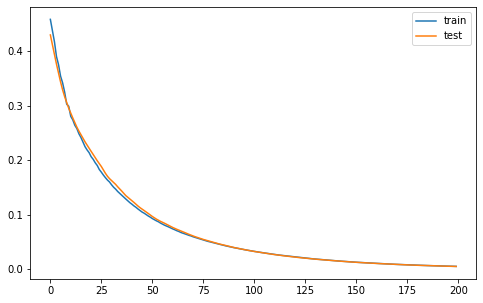

In [ ]:
#Visual plot to check if the error is reducing
pyplot.plot(LSTMModel_fit.history['loss'], label='train')
pyplot.plot(LSTMModel_fit.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
error_Training_LSTM = mean_squared_error(Y_train_LSTM, LSTMModel.predict(X_train_LSTM))
predicted = LSTMModel.predict(X_test_LSTM)
error_Test_LSTM = mean_squared_error(Y_test,predicted)
error_Test_LSTM

0.0008212947798701765

In [ ]:
test_results.append(error_Test_ARIMA)
test_results.append(error_Test_LSTM)

train_results.append(error_Training_ARIMA)
train_results.append(error_Training_LSTM)

names.append("ARIMA")
names.append("LSTM")

### Comparisons

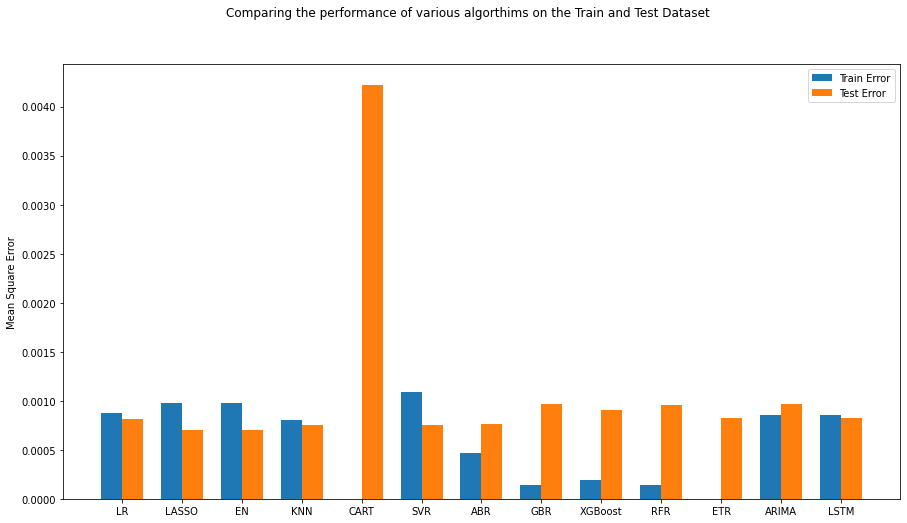

In [ ]:
# compare algorithms
fig = pyplot.figure()

ind = np.arange(len(names))  # the x locations for the groups
width = 0.35  # the width of the bars

fig.suptitle('Comparing the performance of various algorthims on the Train and Test Dataset')
ax = fig.add_subplot(111)
pyplot.bar(ind - width/2, train_results,  width=width, label='Train Error')
pyplot.bar(ind + width/2, test_results, width=width, label='Test Error')
fig.set_size_inches(15,8)
pyplot.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
pyplot.ylabel('Mean Square Error')
pyplot.show()

**Looking at training and test error above, LSTM model perform decently, beating ARIMA model on the test set. So let's use LSTM model for tuning in the next section.**

## Model Tuning

In [ ]:
from keras.regularizers import L1L2

In [ ]:
#Grid Search for LSTM Model

def create_LSTMmodel_gridsearch(n_nodes, lr_rate, optimizer, reg):
    # create model
    model = Sequential()
    model.add(LSTM(n_nodes, input_shape=(X_train_LSTM.shape[1], X_train_LSTM.shape[2]), kernel_regularizer=reg))
    model.add(Dense(1))
    # opt = tensorflow.keras.optimizers.Adam(learning_rate=lr_rate)
    model.compile(loss='mse', optimizer=optimizer)
    return model

def evaluate_LSTM(config):
    # unpack config
    n_nodes, n_epochs, n_batch, lr_rate, opt, reg = config
    model = create_LSTMmodel_gridsearch(n_nodes, lr_rate, opt, reg)
    model_fit = model.fit(X_train_LSTM, Y_train_LSTM,epochs=n_epochs, batch_size=n_batch, verbose=0, shuffle=False)

    return model


# score a model, return None on failure
def repeat_evaluate(config):
    # convert config to a key
    key = str(config)
    # fit and evaluate the model
    model = evaluate_LSTM(config)
    print(key)
    predicted = model.predict(X_test_LSTM)
    scores = mean_squared_error(Y_test_LSTM, predicted)
    print('> Model[%s] %.7f' % (key, scores))
    return scores, config

def grid_search_lstm(cfg_list):
    best_score, best_config = float("inf"), None
		# evaluate configs
    for cfg in cfg_list:
      scores, config = repeat_evaluate(cfg)

      if scores < best_score:
        best_score = scores
        best_config = config

    print('Best LSTM%s MSE=%.7f' % (best_config, best_score))
    return best_config


In [ ]:
# Tune optimizer and regularizers and fixed other hyperparameters
def model_configs():
		# define scope of configs
    n_nodes = [30]
    lr_rate = [0.01]
    n_epochs = [100]
    n_batch = [50]
    optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
    regularizers = [L1L2(l1=0.0, l2=0.0), L1L2(l1=0.0, l2=0.01)]

    # create configs
    configs = list()
    for i in n_nodes:
      for j in n_epochs:
        for k in n_batch:
          for l in lr_rate:
            for opt in optimizer:
              for reg in regularizers:
                cfg = [i, j, k, l, opt, reg]
                configs.append(cfg)
    return configs

cfg_list = model_configs()
best_config = grid_search_lstm(cfg_list)
print(best_config)

[30, 100, 50, 0.01, 'SGD', <keras.regularizers.L1L2 object at 0x7f4410b75dd0>]
> Model[[30, 100, 50, 0.01, 'SGD', <keras.regularizers.L1L2 object at 0x7f4410b75dd0>]] 0.0169709
[30, 100, 50, 0.01, 'SGD', <keras.regularizers.L1L2 object at 0x7f4410b75ad0>]
> Model[[30, 100, 50, 0.01, 'SGD', <keras.regularizers.L1L2 object at 0x7f4410b75ad0>]] 0.0162100
[30, 100, 50, 0.01, 'RMSprop', <keras.regularizers.L1L2 object at 0x7f4410b75dd0>]
> Model[[30, 100, 50, 0.01, 'RMSprop', <keras.regularizers.L1L2 object at 0x7f4410b75dd0>]] 0.0045010
[30, 100, 50, 0.01, 'RMSprop', <keras.regularizers.L1L2 object at 0x7f4410b75ad0>]
> Model[[30, 100, 50, 0.01, 'RMSprop', <keras.regularizers.L1L2 object at 0x7f4410b75ad0>]] 0.0006801
[30, 100, 50, 0.01, 'Adagrad', <keras.regularizers.L1L2 object at 0x7f4410b75dd0>]
> Model[[30, 100, 50, 0.01, 'Adagrad', <keras.regularizers.L1L2 object at 0x7f4410b75dd0>]] 0.0180439
[30, 100, 50, 0.01, 'Adagrad', <keras.regularizers.L1L2 object at 0x7f4410b75ad0>]
> Model[

In [ ]:
print("The best optimizer is",[best_config[4]])
print("The best optimizer is",[best_config[5]])

The best optimizer is ['RMSprop']
The best optimizer is [<keras.regularizers.L1L2 object at 0x7f4410b75ad0>]


In [ ]:
# create a list of configs to try
def model_configs():
		# define scope of configs
    n_nodes = [50, 100, 150]
    lr_rate = [0.01, 0.001]
    n_epochs = [50, 100, 200, 320]
    n_batch = [10, 30, 50, 80, 100]

    optimizer = [best_config[4]]
    regularizers = [best_config[5]]

    # create configs
    configs = list()
    for i in n_nodes:
      for j in n_epochs:
        for k in n_batch:
          for l in lr_rate:
            for opt in optimizer:
              for reg in regularizers:
                cfg = [i, j, k, l, opt, reg]
                configs.append(cfg)
    return configs

cfg_list = model_configs()
best_config = grid_search_lstm(cfg_list)


[50, 50, 10, 0.01, 'RMSprop', <keras.regularizers.L1L2 object at 0x7f4410b75ad0>]
> Model[[50, 50, 10, 0.01, 'RMSprop', <keras.regularizers.L1L2 object at 0x7f4410b75ad0>]] 0.0006929
[50, 50, 10, 0.001, 'RMSprop', <keras.regularizers.L1L2 object at 0x7f4410b75ad0>]
> Model[[50, 50, 10, 0.001, 'RMSprop', <keras.regularizers.L1L2 object at 0x7f4410b75ad0>]] 0.0006898
[50, 50, 30, 0.01, 'RMSprop', <keras.regularizers.L1L2 object at 0x7f4410b75ad0>]
> Model[[50, 50, 30, 0.01, 'RMSprop', <keras.regularizers.L1L2 object at 0x7f4410b75ad0>]] 0.0008763
[50, 50, 30, 0.001, 'RMSprop', <keras.regularizers.L1L2 object at 0x7f4410b75ad0>]
> Model[[50, 50, 30, 0.001, 'RMSprop', <keras.regularizers.L1L2 object at 0x7f4410b75ad0>]] 0.0013376
[50, 50, 50, 0.01, 'RMSprop', <keras.regularizers.L1L2 object at 0x7f4410b75ad0>]
> Model[[50, 50, 50, 0.01, 'RMSprop', <keras.regularizers.L1L2 object at 0x7f4410b75ad0>]] 0.0020637
[50, 50, 50, 0.001, 'RMSprop', <keras.regularizers.L1L2 object at 0x7f4410b75ad0>

## Finalize Model and Evaluate on Test Set


In [ ]:
### Find the best result of LSTM after Grid Search
print("The best configuration is", best_config)
best_lstm_model = evaluate_LSTM(best_config)
print('The best regularizer is ',best_lstm_model.layers[0].kernel_regularizer.__dict__)
predicted_LSTM = best_lstm_model.predict(X_test_LSTM)
predicted_train_LSTM = best_lstm_model.predict(X_train_LSTM)
error_lstm_train_tuned = mean_squared_error(Y_train_LSTM, predicted_train_LSTM)
error_lstm_test_tuned = mean_squared_error(Y_test_LSTM, predicted_LSTM)
print('MSE of LSTM on Training Dataset after grid search is ', error_lstm_train_tuned)
print('MSE of LSTM on Test Dataset after grid search is ', error_lstm_test_tuned)

The best configuration is [100, 100, 80, 0.001, 'RMSprop', <keras.regularizers.L1L2 object at 0x7f4410b75ad0>]
The best regularizer is  {'l1': array(0., dtype=float32), 'l2': array(0.01, dtype=float32)}
MSE of LSTM on Training Dataset after grid search is  0.0009000698329300559
MSE of LSTM on Test Dataset after grid search is  0.0006710441511327388


### Model Comparison for Model Tunning


In [ ]:
gs_test_result = []
gs_train_result = []
gs_name = []

gs_test_result.append(error_Test_LSTM)
gs_test_result.append(error_lstm_test_tuned)

gs_train_result.append(error_Training_LSTM)
gs_train_result.append(error_lstm_train_tuned)


In [ ]:
gs_name.append("LSTM")
gs_name.append("LSTM_tuned")

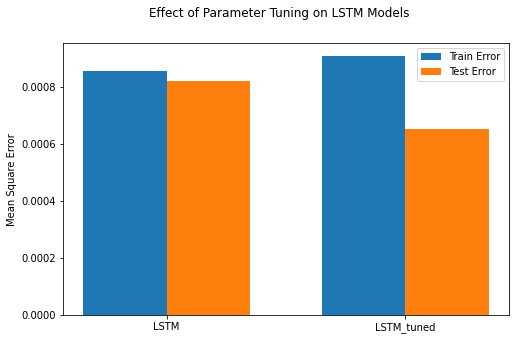

In [ ]:
# compare algorithms
fig = pyplot.figure()

ind = np.arange(len(gs_name))  # the x locations for the groups
width = 0.35  # the width of the barsgs_name

fig.suptitle('Effect of Parameter Tuning on LSTM Models')
ax = fig.add_subplot(111)
pyplot.bar(ind - width/2, gs_train_result,  width=width, label='Train Error')
pyplot.bar(ind + width/2, gs_test_result, width=width, label='Test Error')
fig.set_size_inches(8,5)
pyplot.legend()
ax.set_xticks(ind)
ax.set_xticklabels(gs_name)
pyplot.ylabel('Mean Square Error')
pyplot.show()

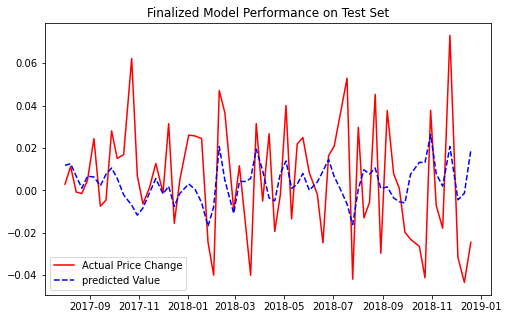

In [ ]:
lstm_predicted = pd.DataFrame(predicted_LSTM)
Y_test_LSTM_df = pd.DataFrame(Y_test_LSTM,index=Y_test.index)
Y_train_LSTM_df = pd.DataFrame(Y_train_LSTM,index=Y_train[1:].index)
lstm_predicted.index = Y_test_LSTM_df.index
pyplot.plot(Y_test_LSTM_df, 'r', label='Actual Price Change')
pyplot.plot(lstm_predicted, 'b--', label='predicted Value')
pyplot.legend()
pyplot.title('Finalized Model Performance on Test Set')
pyplot.rcParams["figure.figsize"] = (8,5)
pyplot.show()

## Evaluation Metrics and White's Reality Check

In [ ]:
from scipy.stats import spearmanr
import detrendPrice
import WhiteRealityCheckFor1
import fAux

In [ ]:
# Calculate cagr, sharpe ratio, Maximum Draw Down, and Calmar Ratio

n_week = 52

positions = np.where(predicted_train_LSTM.squeeze() > 0,1,-1)

weeklyRet = pd.Series(positions).fillna(0).values * pd.Series(Y_train_LSTM)
weeklyRet = weeklyRet.fillna(0)

cumret = np.cumsum(weeklyRet)


cagr = (1 + cumret[len(cumret)-1]) ** (n_week / len(cumret)) - 1
maxDD, maxDDD = fAux.calculateMaxDD(cumret)
ratio = (n_week ** (1.0/2.0)) * np.mean(weeklyRet) / np.std(weeklyRet)
print (('In-sample: CAGR={:0.6} Sharpe ratio={:0.6} maxDD={:0.6} maxDDD={:d} Calmar ratio={:0.6}\n'\
).format(cagr, ratio, maxDD, maxDDD.astype(int), -cagr/maxDD))


lstm_predicted = pd.DataFrame(predicted_LSTM)
positions2 = np.where(lstm_predicted.squeeze() > 0,1,-1 )
weeklyRet2 = pd.Series(positions2).fillna(0).values * Y_test
weeklyRet2 = weeklyRet2.fillna(0)

cumret2 = np.cumsum(weeklyRet2)

rho, pval = spearmanr(Y_test,lstm_predicted.squeeze())
cagr = (1 + cumret2[-1]) ** (n_week / len(cumret2)) - 1
maxDD, maxDDD = fAux.calculateMaxDD(cumret2)
ratio = (n_week ** (1.0/2.0)) * np.mean(weeklyRet2) / np.std(weeklyRet2)
print (('Out-of-sample: CAGR={:0.6} Sharpe ratio={:0.6} maxDD={:0.6} maxDDD={:d} Calmar ratio={:0.6}  Rho={:0.6} PVal={:0.6}\n'\
).format(cagr, ratio, maxDD, maxDDD.astype(int), -cagr/maxDD, rho, pval))



In-sample: CAGR=0.222797 Sharpe ratio=1.57843 maxDD=-0.0878317 maxDDD=26 Calmar ratio=2.53664

Out-of-sample: CAGR=0.331146 Sharpe ratio=1.83028 maxDD=-0.0802288 maxDDD=10 Calmar ratio=4.12752  Rho=0.207399 PVal=0.092172



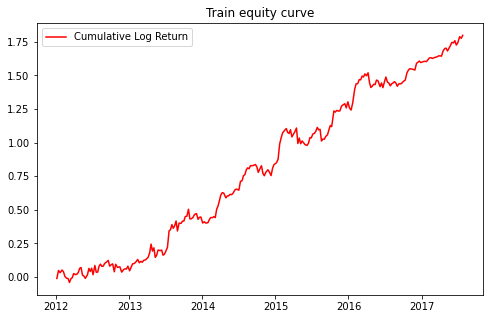

In [ ]:
# Equity Curve on Training set

pyplot.plot(Y_train[1:,].index, cumret , 'r', label='Cumulative Log Return')
pyplot.legend()
pyplot.rcParams["figure.figsize"] = (8,5)
pyplot.title("Train equity curve")
pyplot.show()

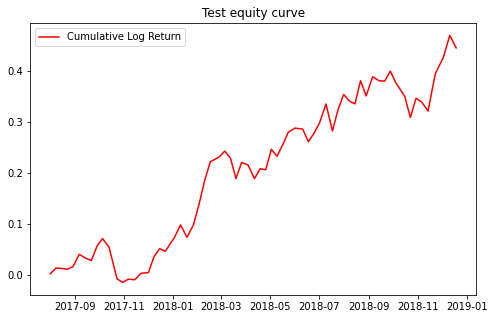

In [ ]:
# Equity Curve on Test Set
pyplot.plot(Y_test.index,cumret2 , 'r', label='Cumulative Log Return')
pyplot.legend()
pyplot.rcParams["figure.figsize"] = (8,5)
pyplot.title("Test equity curve")
pyplot.show()

In [ ]:
close_price=stk_data.loc[:, ('Adj Close', 'MSFT')]
price=close_price.loc[Y_test.index]

average return 0.057885
[-0.07730513  0.07932476]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.0736


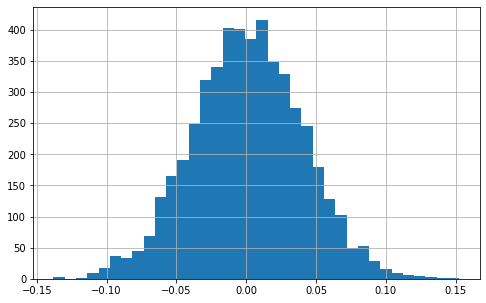

In [ ]:
detrended_close = detrendPrice.detrendPrice(price)
detrended_ret = detrended_close.pct_change(periods=return_period).fillna(0)
detrended_syst_rets = detrended_ret * pd.Series(positions2).shift(5).fillna(0)
WhiteRealityCheckFor1.bootstrap(detrended_syst_rets)
pyplot.show()
